# Projet : Analyse de l'impact de la pollution atmosphérique sur la santé en France Métropolitaine

## I. Objectif  

Développer un pipeline automatisé pour collecter, nettoyer, explorer et analyser les données sur la pollution de l'air et ses effets sur la santé. 
Il s’agit de quantifier le nombre de décès attribuables à l'exposition à la pollution de l'air, en particulier aux particules fines (PM2.5)  et au dioxyde d'azote (NO2) en tenant compte des facteurs démographiques et géographiques.

Selon les estimations, environ 40 000 décès par an en France sont liés à la pollution de l'air ambiant, ce qui représente une perte d'espérance de vie significative pour les personnes exposées.

Cette analyse permettra de répondre aux questions suivantes : 
    
    - Comment les effets de la pollution varient-ils selon les groupes démographiques ?
    
    - Comment la pollution affecte-t-elle différemment les tranches d'âge et les sexes ?
    
    - Y a-t-il des inégalités géographiques dans l'exposition à la pollution et ses effets ?


## II. Description du projet 

Voici les différentes étapes du pipeline : 

### 1.	Collecte des données

Vous allez extraire les données de pollution atmosphérique et de santé (possibilité de développer des scripts Python) pour une ou deux régions sur la période 2019-2020 en interrogeant différentes sources.

a)	Pour les données de pollution : Elles porteront sur les polluants PM2.5 et NO2 avec les caractéristiques suivantes : concentrations moyennes (journalières et/ou annuelles), les piques de concentration (valeurs maximales pour l’évaluation des expositions aigües), les variations saisonnières, les données spatiales (zones géographiques).
Les sources à interroger sont : 

    - Geodair sur la qualité de l’air au quotidien : https://www.geodair.fr

    - Mesures des concentrations des polluants à partir des données ouvertes de data.gouv.fr (en utilisant l’API) (https://www.data.gouv.fr/fr/datasets/donnees-temps-reel-de-mesure-des-concentrations-de-polluants-atmospheriques-reglementes-1/)

    - Des données ouvertes de data.gouv.fr (https://www.data.gouv.fr/fr/datasets/qualite-de-lair-concentration-moyenne-no2-pm2-5-pm10-o3-a-partir-de-2015/ ).   


b)	Pour les données de mortalité, les variables essentielles à considérer pour évaluer l'impact de la pollution de l'air sur la santé sont : 

    - Date de décès : Permet d'analyser les tendances temporelles et de croiser avec les données de pollution (les données doivent être alignées avec celles des polluants).
    - Age du décédé : Segmentation des données par tranche d'âge (par exemple, 0-14 ans, 15-64 ans, 65 ans et plus)
    - Sexe : pour analyser les différences de mortalité entre hommes et femmes
    - Cause du décès (e.g. maladies respiratoires, cardio-vasculaires, cancer du poumon)
    - Lieu du décès : Commune, département de résidence

Les sources à interroger sont la base de données CépiDc de l'INSERM : https://www.data.gouv.fr/fr/datasets/causes-de-deces/ et/ou l’INSEE https://www.insee.fr/fr/statistiques , en vous concentrant sur les décès attribuables à l'exposition à la pollution de l'air (e.g. Maladies de l’appareil respiratoire). 


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [76]:
df_NO_2022 = pd.read_csv("C:/Users/hp/Downloads/NO_2022.csv", delimiter=';')
df_NO_2021 = pd.read_csv("C:/Users/hp/Downloads/NO_2021.csv", delimiter=';')
df_NO_2020 = pd.read_csv("C:/Users/hp/Downloads/NO_2020.csv", delimiter=';')
df_NO_2019 = pd.read_csv("C:/Users/hp/Downloads/NO_2019.csv", delimiter=';')
df_NO_2018 = pd.read_csv("C:/Users/hp/Downloads/NO_2018.csv", delimiter=';')


df_PM_2022 = pd.read_csv("C:/Users/hp/Downloads/PM25_2022.csv", delimiter=';')
df_PM_2021 = pd.read_csv("C:/Users/hp/Downloads/PM25_2021.csv", delimiter=';')
df_PM_2020 = pd.read_csv("C:/Users/hp/Downloads/PM25.csv", delimiter=';')
df_PM_2019 = pd.read_csv("C:/Users/hp/Downloads/PM25_2019.csv", delimiter=';')
df_PM_2018 = pd.read_csv("C:/Users/hp/Downloads/PM25_2018.csv", delimiter=';')

df_mort = pd.read_csv("C:/Users/hp/Downloads/data_mortalite.csv", delimiter=';')


In [4]:
df_NO_2018.head()

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude
0,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,NO2,Fond,...,20.0,20.414919,µg-m3,100.0,100,100.0,R,1,49.119442,6.180833
1,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01012,Metz-Borny,Urbaine,NO2,Fond,...,17.0,17.360360,µg-m3,99.0,100,99.0,R,1,49.110283,6.223336
2,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01016,Atton,Rurale près des villes,NO2,Industrielle,...,19.0,18.548937,µg-m3,98.0,100,98.0,R,1,48.886387,6.093611
3,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,NO2,Fond,...,14.0,13.701306,µg-m3,96.0,100,96.0,R,1,49.107502,6.122775
4,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01019,Thionville-Piscine,Urbaine,NO2,Fond,...,16.0,15.873059,µg-m3,99.0,100,99.0,R,1,49.368610,6.160831


### 2.	Exploration des données

Explorer les données et identifier les différentes variables



In [5]:
df_NO_2019.head()

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude
0,2019/01/01 00:00:00,2019/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,NO2,Fond,...,19.0,18.757263,µg-m3,99.0,100.0,99.0,R,1,49.119442,6.180833
1,2019/01/01 00:00:00,2019/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01012,Metz-Borny,Urbaine,NO2,Fond,...,17.0,17.416015,µg-m3,96.0,100.0,96.0,R,1,49.110283,6.223336
2,2019/01/01 00:00:00,2019/12/31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01016,Atton,Rurale près des villes,NO2,Industrielle,...,16.0,15.969884,µg-m3,96.0,100.0,96.0,R,1,48.886387,6.093611
3,2019/01/01 00:00:00,2019/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,NO2,Fond,...,13.0,12.889262,µg-m3,NaN,NaN,NaN,R,1,49.107502,6.122775
4,2019/01/01 00:00:00,2019/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01019,Thionville-Piscine,Urbaine,NO2,Fond,...,17.0,16.857790,µg-m3,97.0,99.0,96.0,R,1,49.368610,6.160831


In [6]:
df_PM_2018.head()

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude
0,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,PM2.5,Fond,...,12.0,12.459770,µg-m3,91.0,100,91.0,R,1,49.119442,6.180833
1,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,PM2.5,Fond,...,10.0,10.479867,µg-m3,99.0,100,99.0,R,1,49.358337,6.156942
2,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01065,Belleville sur Meuse,Urbaine,PM2.5,Trafic,...,12.0,12.249369,µg-m3,97.0,100,97.0,R,1,49.167780,5.387461
3,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02008,Port de Bouc Leque,Urbaine,PM2.5,Industrielle,...,12.0,11.638948,µg-m3,98.0,100,98.0,R,1,43.401952,4.981919
4,2018/01/01 00:00:00,2018/12/31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR03006,MARSEILLE RABATAU,Urbaine,PM2.5,Trafic,...,13.0,13.462818,µg-m3,99.0,100,99.0,R,1,43.276451,5.397360


In [8]:
df_mort.head()

,annee_de_deces,region_de_domicile,classe_d_age_de_10_ans,sexe,cause_initiale_de_deces,effectif_de_deces
0,2019,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,3
1,2020,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,4
2,2021,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,6
3,2022,1,35-44,Hommes,7. Maladies de l’appareil circulatoire,4
4,2019,2,35-44,Hommes,7. Maladies de l’appareil circulatoire,1


In [9]:
df_NO_2018.info()
df_PM_2018.info()
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date de début          431 non-null    object 
 1   Date de fin            431 non-null    object 
 2   Organisme              431 non-null    object 
 3   code zas               431 non-null    object 
 4   Zas                    431 non-null    object 
 5   code site              431 non-null    object 
 6   nom site               431 non-null    object 
 7   type d'implantation    431 non-null    object 
 8   Polluant               431 non-null    object 
 9   type d'influence       431 non-null    object 
 10  Réglementaire          431 non-null    object 
 11  type d'évaluation      431 non-null    object 
 12  type de valeur         431 non-null    object 
 13  valeur                 431 non-null    float64
 14  valeur brute           431 non-null    float64
 15  unité 

In [10]:
df_NO_2019.describe()

,valeur,valeur brute,taux de saisie,couverture temporelle,couverture de données,validité,Latitude,Longitude
count,417.000000,417.000000,358.000000,358.000000,358.000000,417.000000,417.000000,417.000000
mean,18.556355,18.533260,96.790503,96.628492,93.625698,0.889688,43.680373,2.850982
std,10.978664,10.989536,5.374827,14.820645,15.383960,0.457117,13.259083,14.671563
min,1.000000,0.907314,49.000000,1.000000,0.000000,-1.000000,-21.334406,-61.727203
25%,11.000000,10.997624,96.000000,99.000000,95.000000,1.000000,44.841373,0.823951
50%,16.000000,15.784975,98.000000,100.000000,98.000000,1.000000,46.814694,3.111592
75%,24.000000,23.753816,99.000000,100.000000,99.000000,1.000000,48.830387,5.676700
max,73.000000,73.334888,100.000000,100.000000,100.000000,1.000000,51.032761,55.618977


In [11]:
df_NO_2022.describe()

,valeur,valeur brute,taux de saisie,couverture temporelle,couverture de données,validité,Latitude,Longitude
count,399.000000,399.000000,343.000000,343.000000,343.000000,399.000000,399.000000,399.000000
mean,15.621554,15.628831,95.941691,96.521866,93.346939,0.859649,42.972277,2.503842
std,9.392322,9.391966,9.263339,15.034229,15.755971,0.511526,14.407863,16.110543
min,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-21.334406,-63.081481
25%,9.000000,9.249362,96.000000,99.000000,95.000000,1.000000,44.551920,0.693902
50%,13.000000,13.274440,98.000000,100.000000,98.000000,1.000000,46.798278,2.903510
75%,20.500000,20.349660,99.000000,100.000000,99.000000,1.000000,48.787532,5.472276
max,52.000000,51.999658,100.000000,100.000000,100.000000,1.000000,51.032761,55.618977


a) Montrer l'évolution des niveaux de pollution


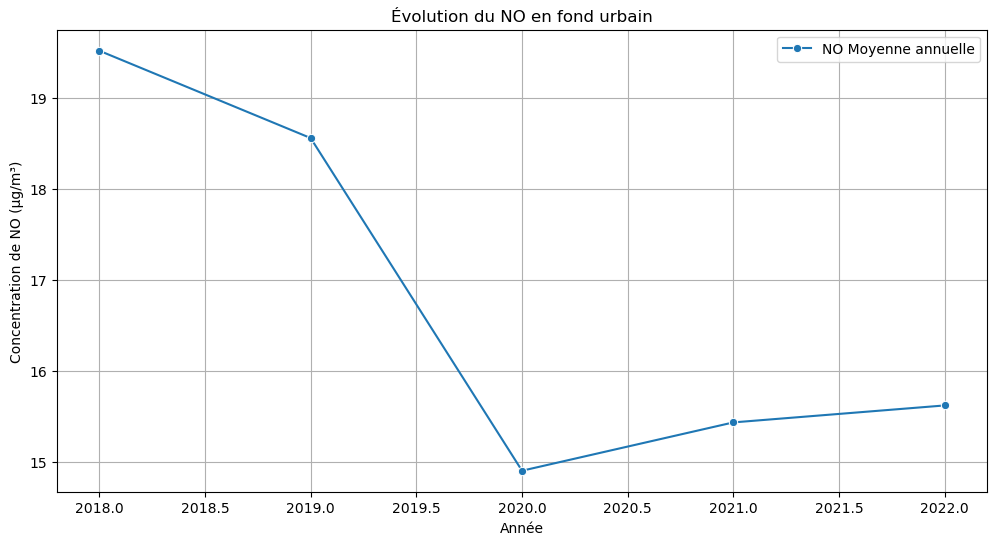

In [13]:
for df, year in zip([df_NO_2022, df_NO_2021, df_NO_2020, df_NO_2019, df_NO_2018], [2022, 2021, 2020, 2019, 2018]):
    df["Année"] = year

# Concaténer toutes les années NO en un seul DataFrame
df_NO = pd.concat([df_NO_2022, df_NO_2021, df_NO_2020, df_NO_2019, df_NO_2018])

# Regrouper les données NO par année pour obtenir la moyenne annuelle
df_NO_grouped = df_NO.groupby("Année")["valeur"].mean().reset_index()
df_NO_grouped.rename(columns={"valeur": "NO Moyenne annuelle"}, inplace=True)

# Tracer l'évolution du NO au fil des années
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_NO_grouped, x="Année", y="NO Moyenne annuelle", marker="o", label="NO Moyenne annuelle")

plt.xlabel("Année")
plt.ylabel("Concentration de NO (µg/m³)")
plt.title("Évolution du NO en fond urbain")
plt.legend()
plt.grid()
plt.show()


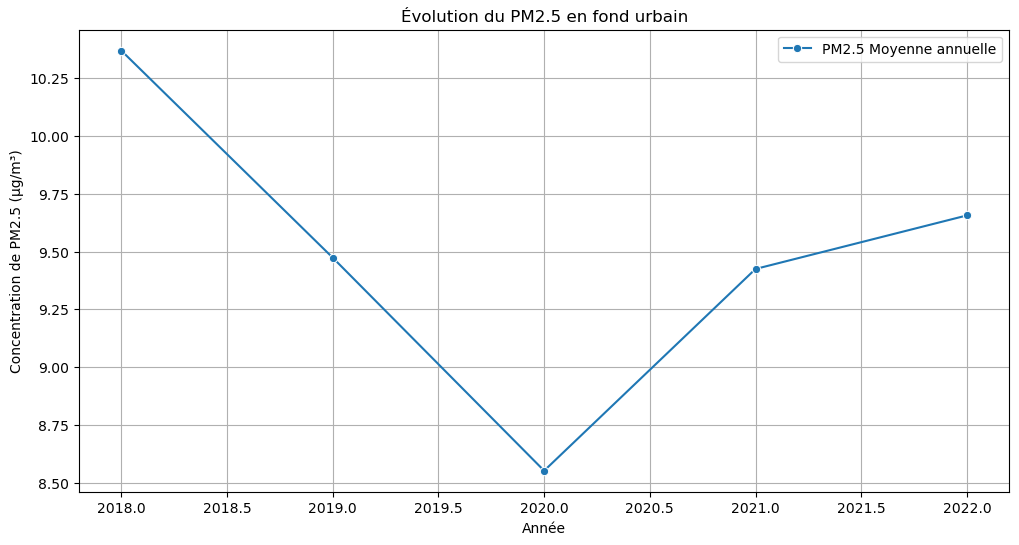

In [14]:
for df, year in zip([df_PM_2022, df_PM_2021, df_PM_2020, df_PM_2019, df_PM_2018], [2022, 2021, 2020, 2019, 2018]):
    df["Année"] = year

# Concaténer toutes les années PM2.5 en un seul DataFrame
df_PM = pd.concat([df_PM_2022, df_PM_2021, df_PM_2020, df_PM_2019, df_PM_2018])

# Regrouper les données PM2.5 par année pour obtenir la moyenne annuelle
df_PM_grouped = df_PM.groupby("Année")["valeur"].mean().reset_index()
df_PM_grouped.rename(columns={"valeur": "PM2.5 Moyenne annuelle"}, inplace=True)

# Tracer l'évolution du PM2.5 au fil des années
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_PM_grouped, x="Année", y="PM2.5 Moyenne annuelle", marker="o", label="PM2.5 Moyenne annuelle")

plt.xlabel("Année")
plt.ylabel("Concentration de PM2.5 (µg/m³)")
plt.title("Évolution du PM2.5 en fond urbain")
plt.legend()
plt.grid()
plt.show()


b) Analyser les corrélations entre les niveaux de polluants (PM2.5 et NO2) et les taux de mortalité 

   Mortalité  Année_x  PM2.5 Moyenne annuelle  NO Moyenne annuelle
0     760468     2019                9.473373            18.556355
1     729528     2020                8.551546            14.904878
2     726654     2021                9.424837            15.435323
3     762088     2022                9.656522            15.621554


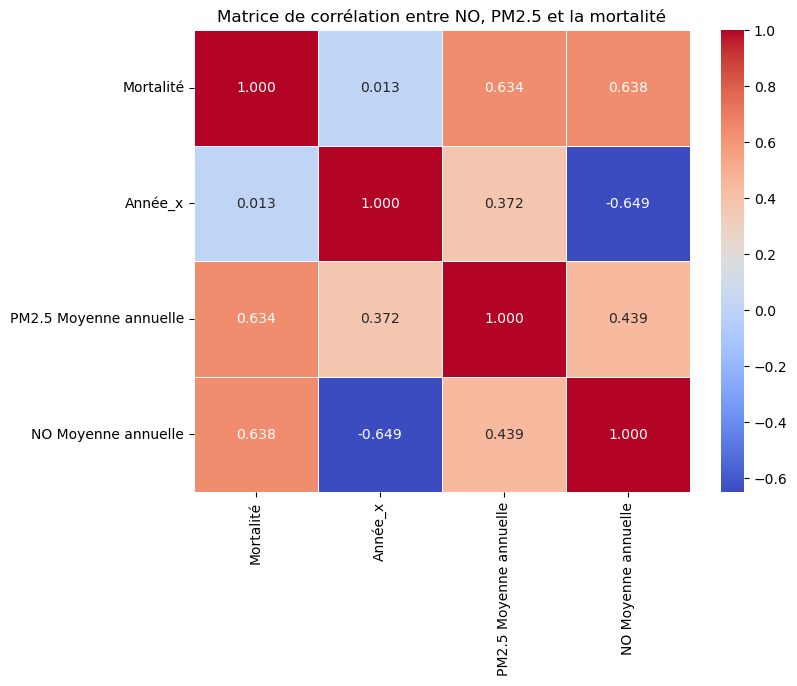

Corrélation entre NO et mortalité : 0.638
Corrélation entre PM2.5 et mortalité : 0.634


In [15]:


df_NO_grouped = df_NO.groupby("Année")["valeur"].mean().reset_index()
df_NO_grouped.rename(columns={"valeur": "NO Moyenne annuelle"}, inplace=True)


df_PM_grouped = df_PM.groupby("Année")["valeur"].mean().reset_index()
df_PM_grouped.rename(columns={"valeur": "PM2.5 Moyenne annuelle"}, inplace=True)

df_mort_sans_covid = df_mort[~df_mort["cause_initiale_de_deces"].str.contains("U071|U072|U109|U12918", na=False)]

# Regrouper les décès par année
df_morta_grouped_sans_covid = df_mort_sans_covid.groupby("annee_de_deces")["effectif_de_deces"].sum().reset_index()

# Fusionner les données pollution et mortalité
df_comparaison = df_morta_grouped_sans_covid.merge(df_PM_grouped, left_on="annee_de_deces", right_on="Année")
df_comparaison = df_comparaison.merge(df_NO_grouped, left_on="annee_de_deces", right_on="Année")
df_comparaison.drop(columns=["Année_y"], inplace=True)  # Éviter la redondance
df_comparaison.drop(columns=["annee_de_deces"], inplace=True)  # Éviter la redondance


df_comparaison.rename(columns={"effectif_de_deces": "Mortalité"}, inplace=True)

# Vérifier la structure des données après fusion
print(df_comparaison)

# Calculer la matrice de corrélation
corr_matrix = df_comparaison.corr()

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Matrice de corrélation entre NO, PM2.5 et la mortalité")
plt.show()

# Calcul des corrélations spécifiques
correlation_no_mortalite = df_comparaison["NO Moyenne annuelle"].corr(df_comparaison["Mortalité"])
correlation_pm_mortalite = df_comparaison["PM2.5 Moyenne annuelle"].corr(df_comparaison["Mortalité"])

print(f"Corrélation entre NO et mortalité : {correlation_no_mortalite:.3f}")
print(f"Corrélation entre PM2.5 et mortalité : {correlation_pm_mortalite:.3f}")


c)	Déterminer les différences entre groupes démographiques.

  classe_d_age_de_10_ans  effectif_de_deces
0                  35-44              29594
1                  45-54             107778
2                  55-64             300218
3                  65-74             601106
4                  75-84             803294
5                  85-94            1169248
6                    95p             309612


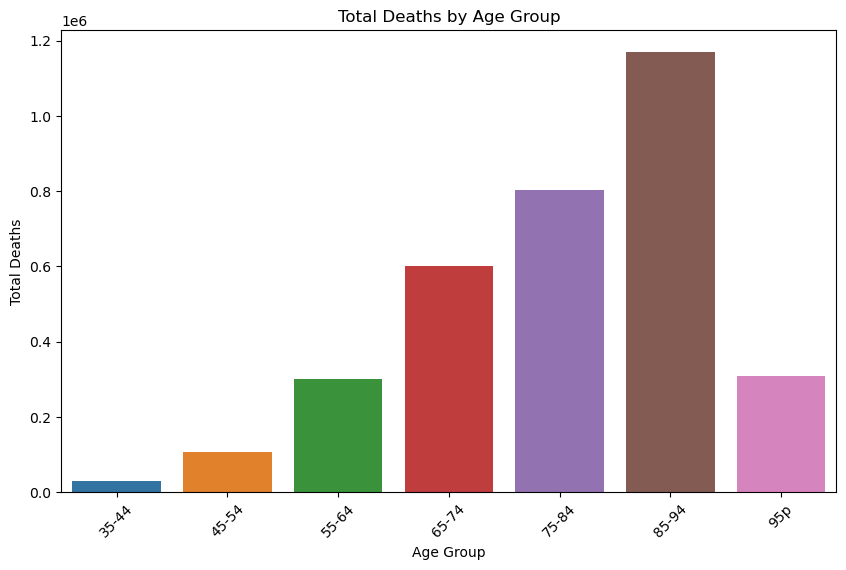

In [29]:
age_groups = df_mort.groupby('classe_d_age_de_10_ans').agg({'effectif_de_deces': 'sum'}).reset_index()

print(age_groups)
plt.figure(figsize=(10, 6))
sns.barplot(x='classe_d_age_de_10_ans', y='effectif_de_deces', data=age_groups)
plt.xticks(rotation=45)
plt.title("Total Deaths by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Deaths")
plt.show()




    region_de_domicile  effectif_de_deces
0                    1              18146
1                    2              18418
2                    3               4402
3                    4              26268
4                    6               3366
5                   11             421916
6                   24             144136
7                   27             163082
8                   28             185338
9                   32             304210
10                  44             299810
11                  52             192306
12                  53             187486
13                  75             347512
14                  76             321770
15                  84             386142
16                  93             279066
17                  94              17476


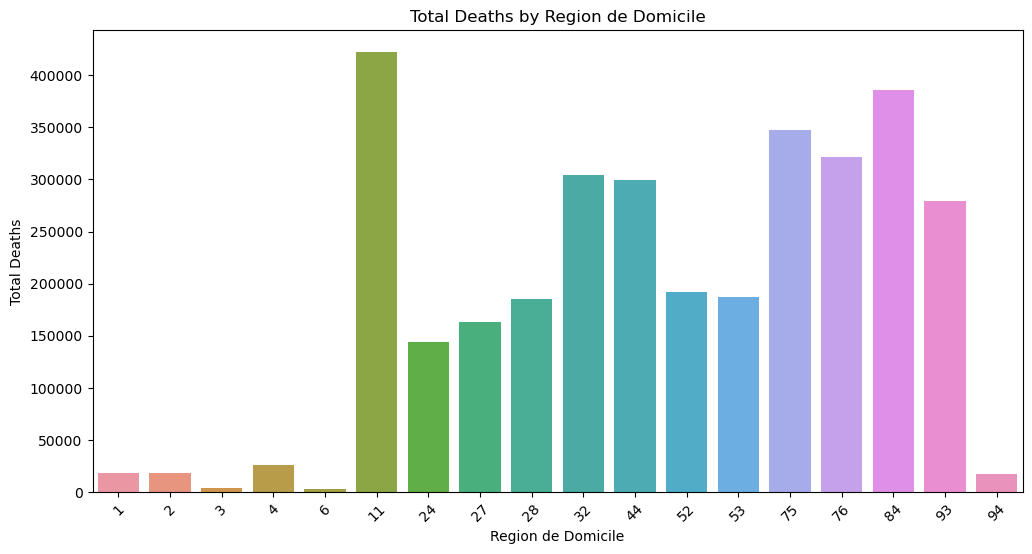

In [27]:
# Group the data by 'region_de_domicile' (region of residence) and calculate total deaths in each region
region_groups = df_mort.groupby('region_de_domicile').agg({'effectif_de_deces': 'sum'}).reset_index()

# Display the result
print(region_groups)

plt.figure(figsize=(12, 6))
sns.barplot(x='region_de_domicile', y='effectif_de_deces', data=region_groups)
plt.xticks(rotation=45)
plt.title("Total Deaths by Region de Domicile")
plt.xlabel("Region de Domicile")
plt.ylabel("Total Deaths")
plt.show()




         sexe  effectif_de_deces
0      Femmes             800763
1      Hommes             859662
2  Tous sexes            1660425


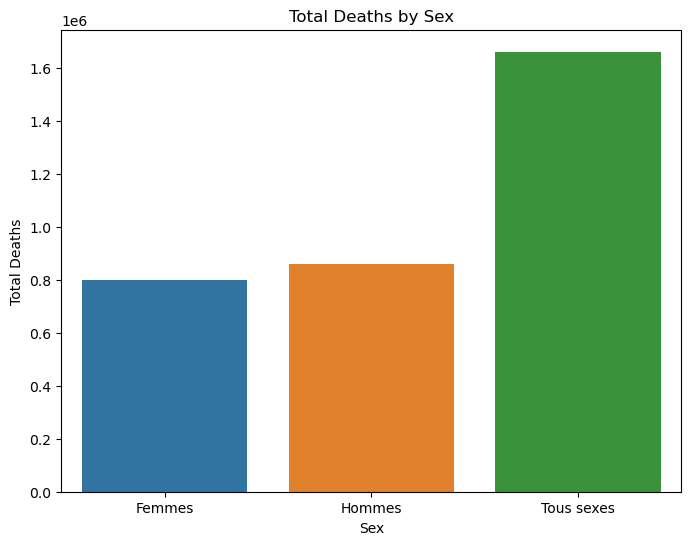

In [25]:
sex_groups = df_mort.groupby('sexe').agg({'effectif_de_deces': 'sum'}).reset_index()

print(sex_groups)
plt.figure(figsize=(8, 6))
sns.barplot(x='sexe', y='effectif_de_deces', data=sex_groups)
plt.title("Total Deaths by Sex")
plt.xlabel("Sex")
plt.ylabel("Total Deaths")
plt.show()



### 3.	Nettoyage et prétraitement

Créer des fonctions pour chaque étape du nettoyage : 



a) Traiter les valeurs manquantes dans les données de pollution et de santé 

In [32]:
df_PM.isna().sum()

Date de début             0
Date de fin               0
Organisme                 0
code zas                  0
Zas                       0
code site                 0
nom site                  0
type d'implantation       0
Polluant                  0
type d'influence          0
Réglementaire             0
type d'évaluation         0
type de valeur            0
valeur                    0
valeur brute              0
unité de mesure           0
taux de saisie           64
couverture temporelle    64
couverture de données    64
code qualité              0
validité                  0
Latitude                  0
Longitude                 0
Année                     0
dtype: int64

In [35]:
from sklearn.impute import KNNImputer


# Imputation des données numériques par KNN
knn_imputer = KNNImputer(n_neighbors=2)  # n_neighbors détermine le nombre de voisins à considérer

# Sélectionner uniquement les colonnes numériques pour l'imputation
df_numeric = df_PM[['taux de saisie', 'couverture temporelle', 'couverture de données']]

# Appliquer l'imputation KNN
df_numeric_imputed = knn_imputer.fit_transform(df_numeric)

# Remplacer les colonnes avec les valeurs imputées dans le dataframe d'origine
df_PM[['taux de saisie', 'couverture temporelle', 'couverture de données']] = df_numeric_imputed

# Afficher le dataframe après l'imputation
df_PM.isna().sum()

Date de début            0
Date de fin              0
Organisme                0
code zas                 0
Zas                      0
code site                0
nom site                 0
type d'implantation      0
Polluant                 0
type d'influence         0
Réglementaire            0
type d'évaluation        0
type de valeur           0
valeur                   0
valeur brute             0
unité de mesure          0
taux de saisie           0
couverture temporelle    0
couverture de données    0
code qualité             0
validité                 0
Latitude                 0
Longitude                0
Année                    0
dtype: int64

In [36]:
df_NO.isna().sum()

Date de début              0
Date de fin                0
Organisme                  0
code zas                   0
Zas                        0
code site                  0
nom site                   0
type d'implantation        0
Polluant                   0
type d'influence           0
Réglementaire              0
type d'évaluation          0
type de valeur             0
valeur                     0
valeur brute               0
unité de mesure            0
taux de saisie           231
couverture temporelle    231
couverture de données    231
code qualité               0
validité                   0
Latitude                   0
Longitude                  0
Année                      0
dtype: int64

In [37]:
knn_imputer = KNNImputer(n_neighbors=2)  # n_neighbors détermine le nombre de voisins à considérer

# Sélectionner uniquement les colonnes numériques pour l'imputation
df_numeric = df_NO[['taux de saisie', 'couverture temporelle', 'couverture de données']]

# Appliquer l'imputation KNN
df_numeric_imputed = knn_imputer.fit_transform(df_numeric)

# Remplacer les colonnes avec les valeurs imputées dans le dataframe d'origine
df_NO[['taux de saisie', 'couverture temporelle', 'couverture de données']] = df_numeric_imputed

df_NO.isna().sum()

Date de début            0
Date de fin              0
Organisme                0
code zas                 0
Zas                      0
code site                0
nom site                 0
type d'implantation      0
Polluant                 0
type d'influence         0
Réglementaire            0
type d'évaluation        0
type de valeur           0
valeur                   0
valeur brute             0
unité de mesure          0
taux de saisie           0
couverture temporelle    0
couverture de données    0
code qualité             0
validité                 0
Latitude                 0
Longitude                0
Année                    0
dtype: int64

b) Harmoniser les formats de date, localisation entre les différentes sources de données


In [85]:
df_PM["Date de début"] = pd.to_datetime(df_PM["Date de début"], dayfirst=True, errors="coerce")
df_NO["Date de fin"] = pd.to_datetime(df_NO["Date de fin"], dayfirst=True, errors="coerce")
df_NO["Date de début"] = pd.to_datetime(df_NO["Date de début"], dayfirst=True, errors="coerce")
df_PM["Année"] = pd.to_datetime(df_PM["Année"], dayfirst=True, errors="coerce")
df_NO["Année"] = pd.to_datetime(df_NO["Année"], dayfirst=True, errors="coerce")
df_PM["Date de fin"] = pd.to_datetime(df_PM["Date de fin"], dayfirst=True, errors="coerce")
df_mort["annee_de_deces"] = pd.to_datetime(df_mort["annee_de_deces"], format='%Y', errors="coerce")


df_PM

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Année
0,2019-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,PM2.5,Fond,...,0.623670,µg-m3,-1.035291,0.290950,-0.306381,R,0.356848,0.419136,0.266783,1970-01-01 00:00:00.000000001
1,2019-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,PM2.5,Fond,...,-0.818303,µg-m3,-0.165812,0.231470,0.084024,R,0.356848,0.438219,0.265152,1970-01-01 00:00:00.000000001
2,2019-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01065,Belleville sur Meuse,Urbaine,PM2.5,Trafic,...,-0.050655,µg-m3,0.160242,0.290950,0.307113,R,0.356848,0.422997,0.212628,1970-01-01 00:00:00.000000001
3,2019-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02008,Port de Bouc Leque,Urbaine,PM2.5,Industrielle,...,0.022009,µg-m3,0.486296,0.290950,0.474429,R,0.356848,-0.037565,0.184945,1970-01-01 00:00:00.000000001
4,2019-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02013,Fos Les Carabins,Périurbaine,PM2.5,Industrielle,...,0.210104,µg-m3,0.377612,-0.244373,-0.083293,R,0.356848,-0.033013,0.181713,1970-01-01 00:00:00.000000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2019-01-01,2018-12-31 23:59:59,QUALITAIR CORSE,FR94ZRE01,ZR CORSE,FR41024,VENACO,Rurale régionale,PM2.5,Fond,...,-1.810938,µg-m3,-0.817921,0.231470,-0.250609,R,0.356848,-0.130696,0.472191,1969-12-31 23:59:59.999999999
153,2019-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR03,ZAR BESANCON,FR82006,Besancon Prevoyance,Urbaine,PM2.5,Fond,...,1.112255,µg-m3,0.268927,0.290950,0.362885,R,0.356848,0.269602,0.255492,1969-12-31 23:59:59.999999999
154,2019-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR01,ZAR BELFORT-MONTBELIARD,FR82010,Montbéliard centre,Urbaine,PM2.5,Fond,...,0.732121,µg-m3,0.268927,0.231470,0.362885,R,0.356848,0.290602,0.308638,1969-12-31 23:59:59.999999999
155,2019-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,PM2.5,Fond,...,0.276031,µg-m3,0.486296,0.290950,0.474429,R,0.356848,0.223586,0.224174,1969-12-31 23:59:59.999999999


c) Gérer les incohérences potentielles  


Doublons détectés :
Empty DataFrame
Columns: [Date de début, Date de fin, Organisme, code zas, Zas, code site, nom site, type d'implantation, Polluant, type d'influence, Réglementaire, type d'évaluation, type de valeur, valeur, valeur brute, unité de mesure, taux de saisie, couverture temporelle, couverture de données, code qualité, validité, Latitude, Longitude, Année]
Index: []

[0 rows x 24 columns]
Empty DataFrame
Columns: [Date de début, Date de fin, Organisme, code zas, Zas, code site, nom site, type d'implantation, Polluant, type d'influence, Réglementaire, type d'évaluation, type de valeur, valeur, valeur brute, unité de mesure, taux de saisie, couverture temporelle, couverture de données, code qualité, validité, Latitude, Longitude, Année]
Index: []

[0 rows x 24 columns]
Empty DataFrame
Columns: [annee_de_deces, region_de_domicile, classe_d_age_de_10_ans, sexe, cause_initiale_de_deces, effectif_de_deces]
Index: []
Types de données :
Date de début            datetime64[ns]
Da

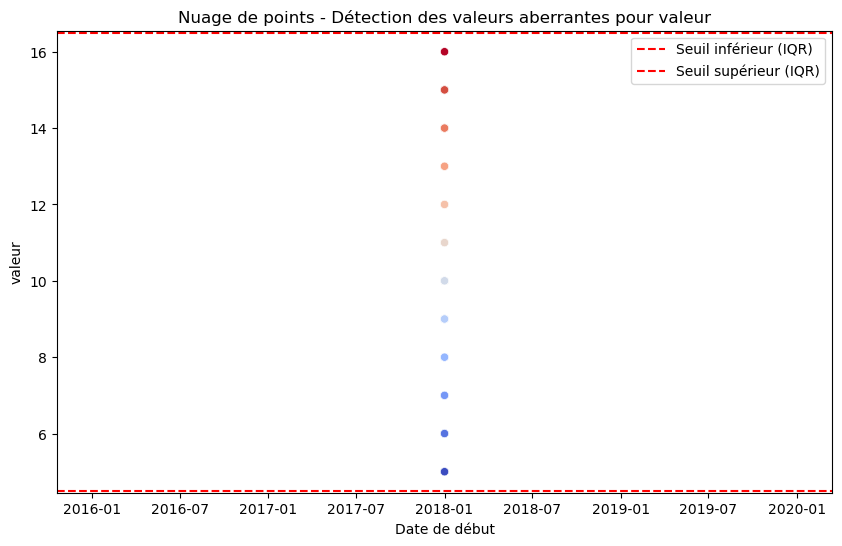

✔️ Les valeurs aberrantes de 'valeur' ont été remplacées par la médiane (10.0).


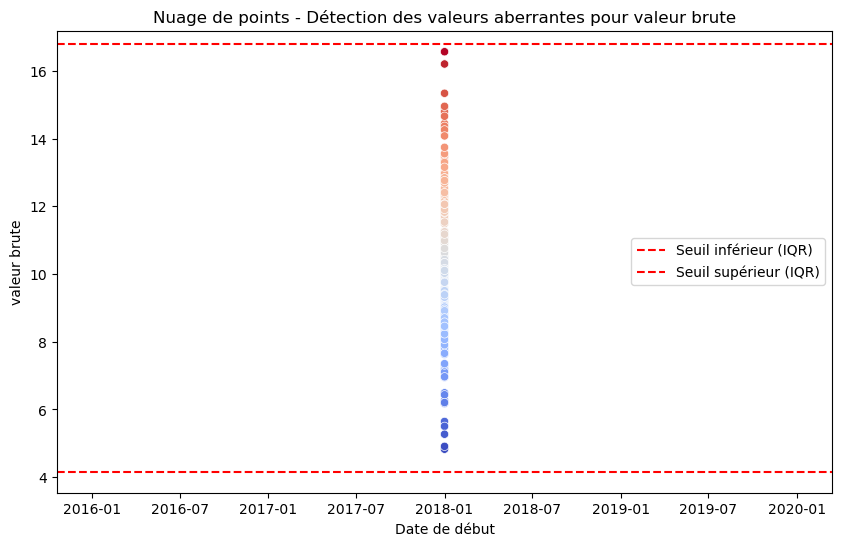

✔️ Les valeurs aberrantes de 'valeur brute' ont été remplacées par la médiane (10.339218676677628).


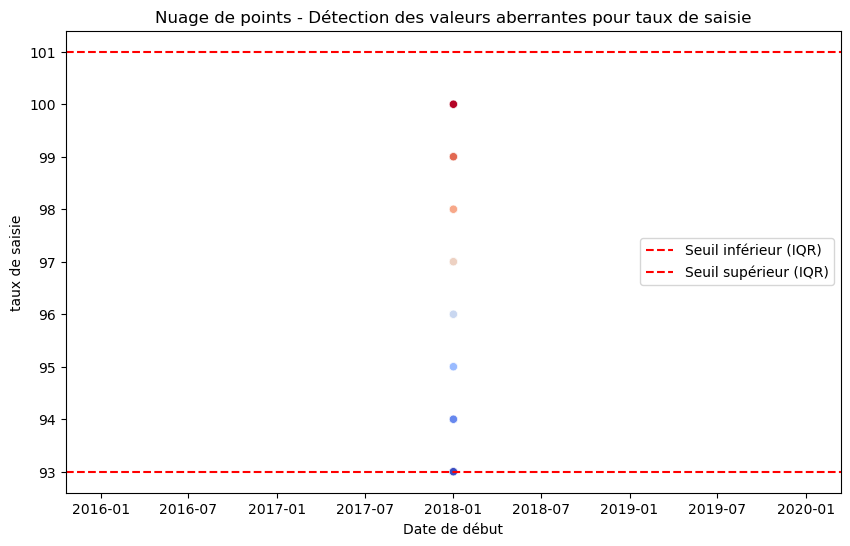

✔️ Les valeurs aberrantes de 'taux de saisie' ont été remplacées par la médiane (97.0).


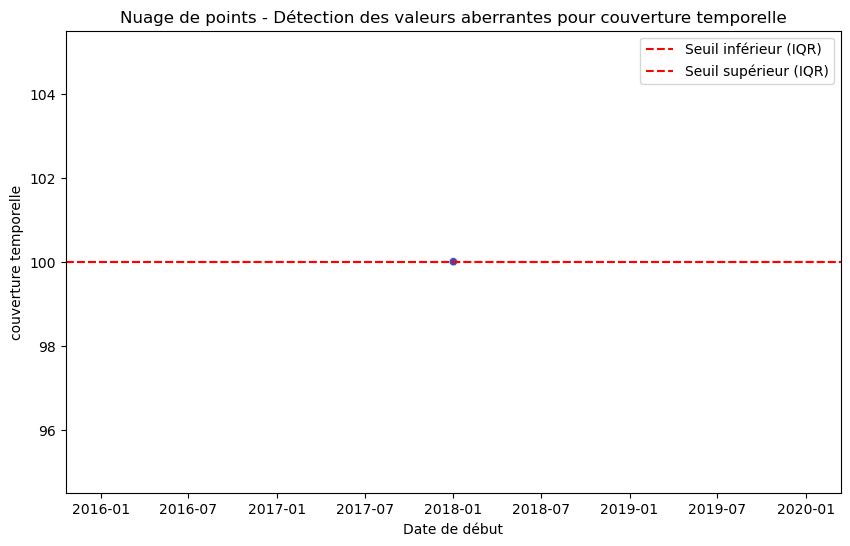

✔️ Les valeurs aberrantes de 'couverture temporelle' ont été remplacées par la médiane (100.0).


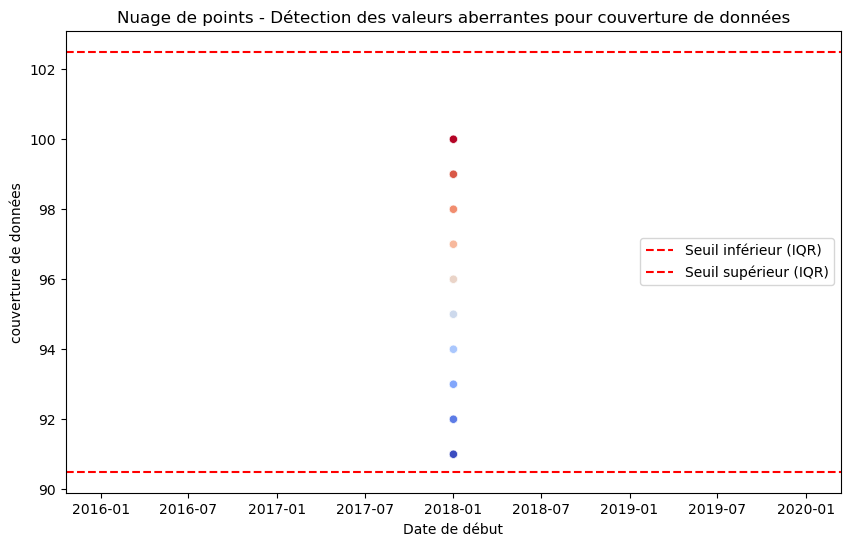

✔️ Les valeurs aberrantes de 'couverture de données' ont été remplacées par la médiane (96.0).


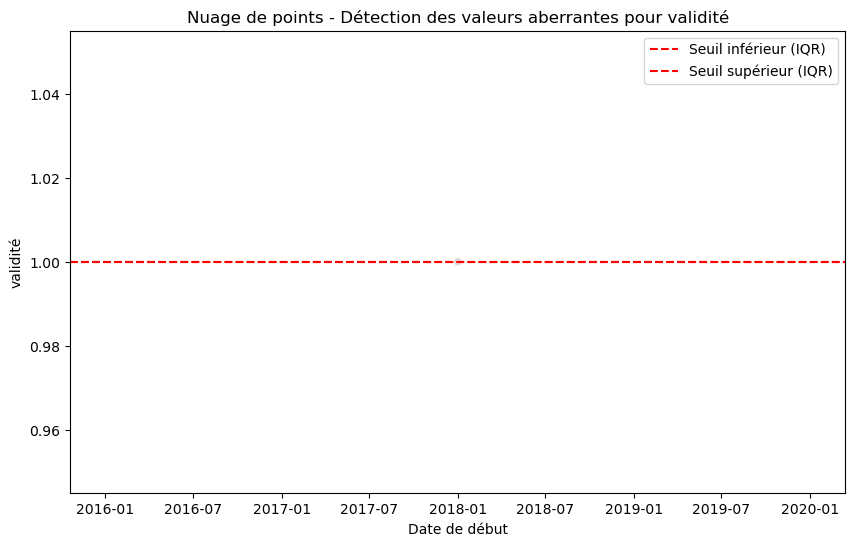

✔️ Les valeurs aberrantes de 'validité' ont été remplacées par la médiane (1.0).


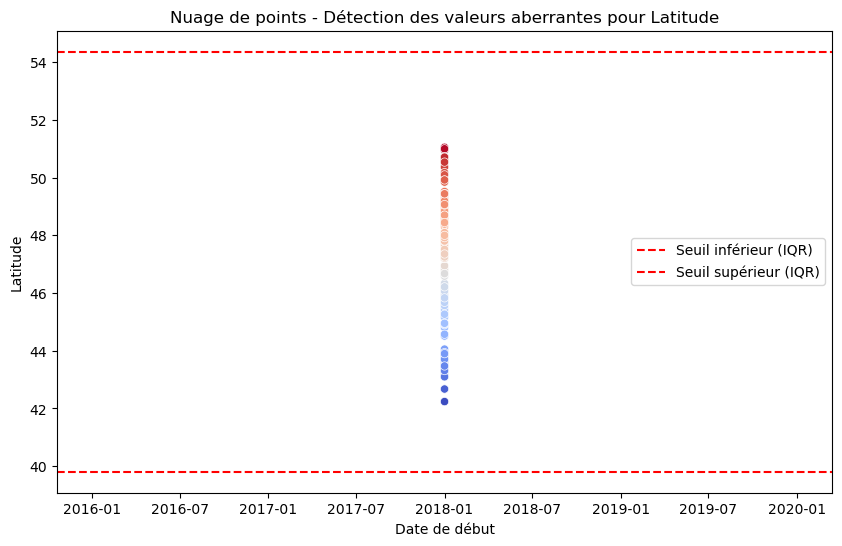

✔️ Les valeurs aberrantes de 'Latitude' ont été remplacées par la médiane (47.204356).


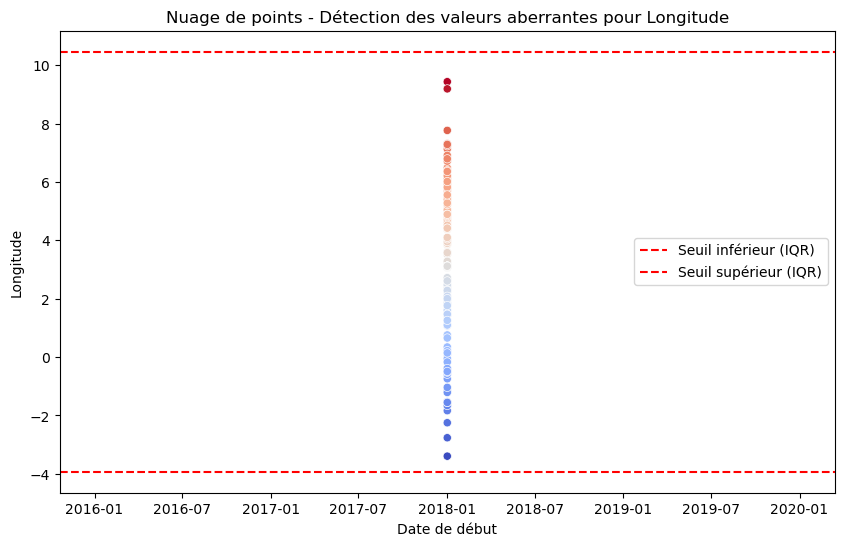

✔️ Les valeurs aberrantes de 'Longitude' ont été remplacées par la médiane (3.113833).


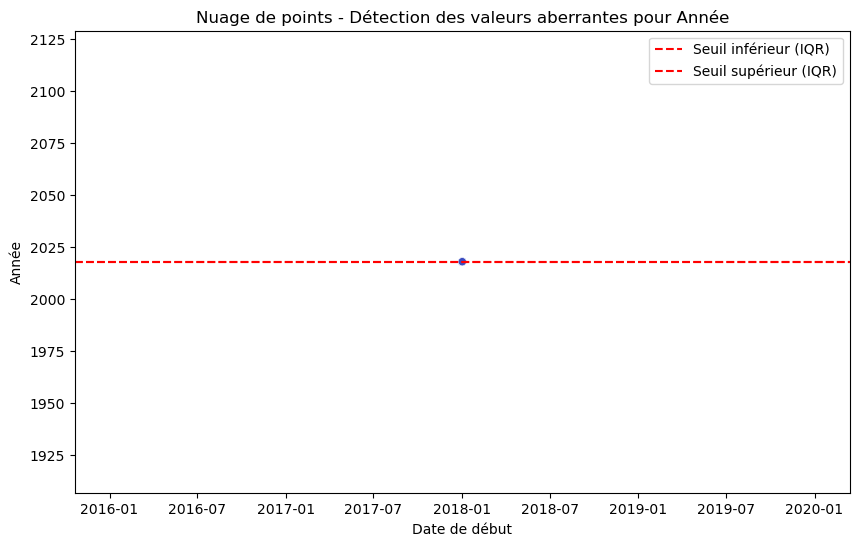

✔️ Les valeurs aberrantes de 'Année' ont été remplacées par la médiane (2018.0).


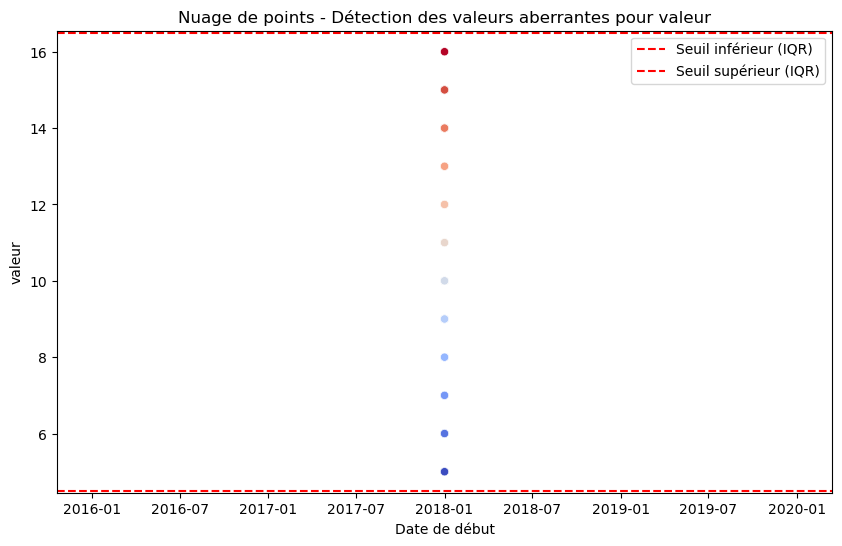

✔️ Les valeurs aberrantes de 'valeur' ont été remplacées par la médiane (10.0).


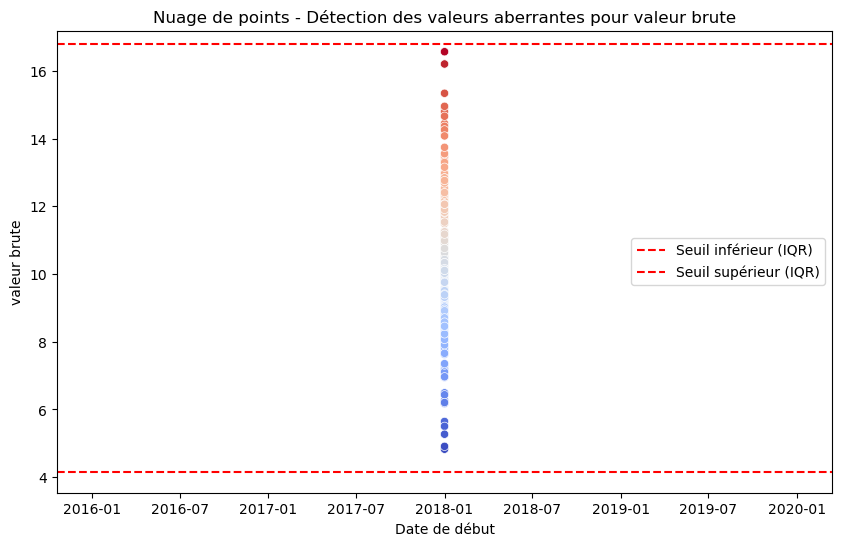

✔️ Les valeurs aberrantes de 'valeur brute' ont été remplacées par la médiane (10.339218676677628).


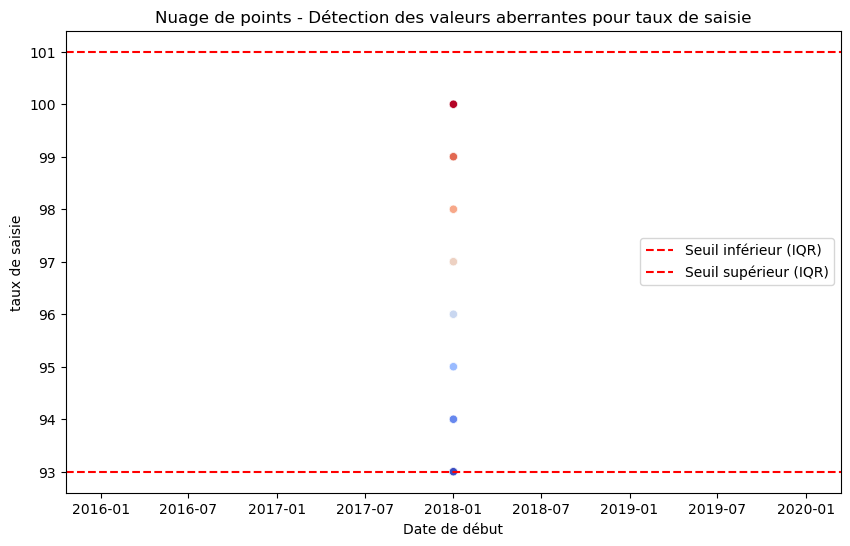

✔️ Les valeurs aberrantes de 'taux de saisie' ont été remplacées par la médiane (97.0).


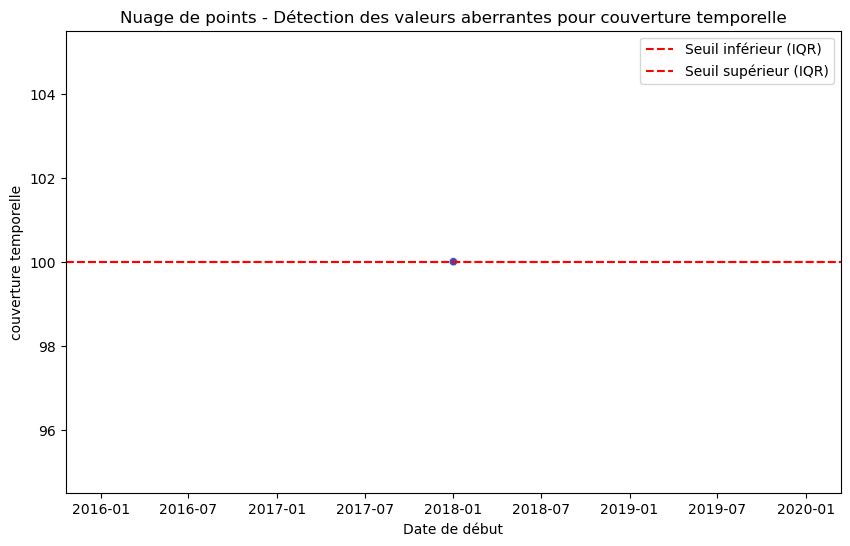

✔️ Les valeurs aberrantes de 'couverture temporelle' ont été remplacées par la médiane (100.0).


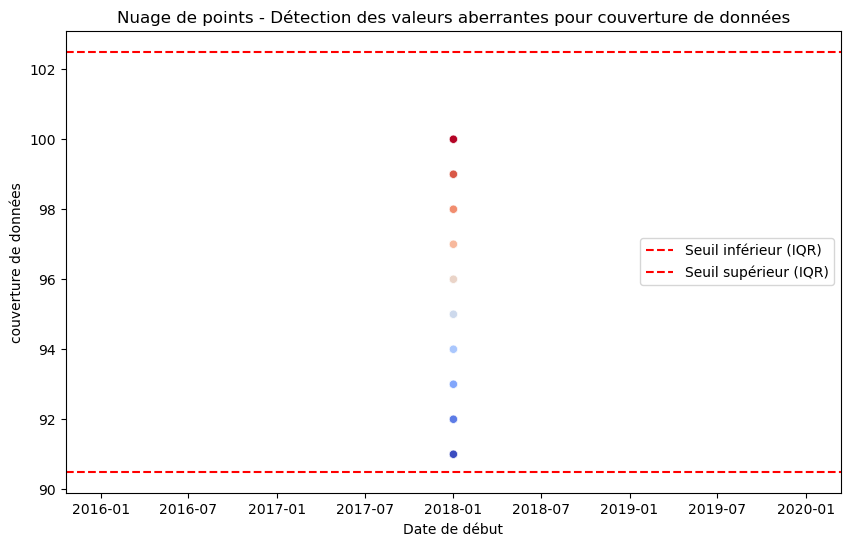

✔️ Les valeurs aberrantes de 'couverture de données' ont été remplacées par la médiane (96.0).


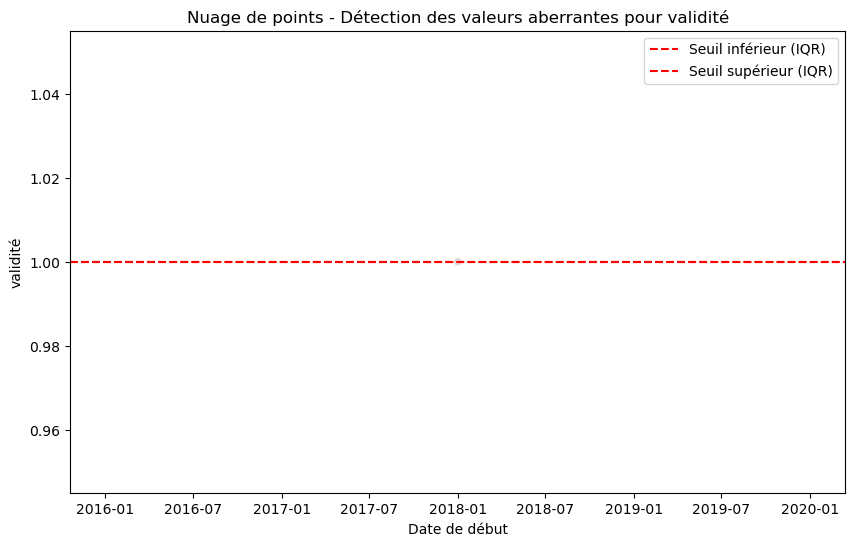

✔️ Les valeurs aberrantes de 'validité' ont été remplacées par la médiane (1.0).


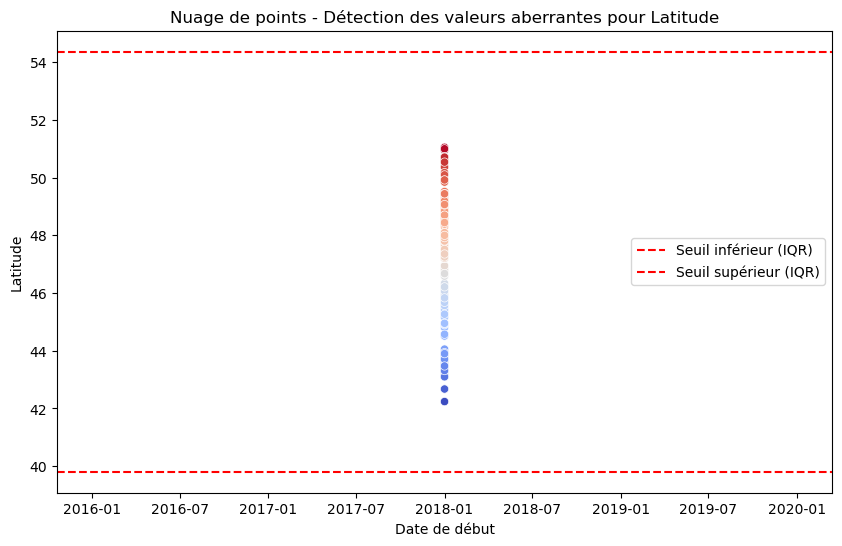

✔️ Les valeurs aberrantes de 'Latitude' ont été remplacées par la médiane (47.204356).


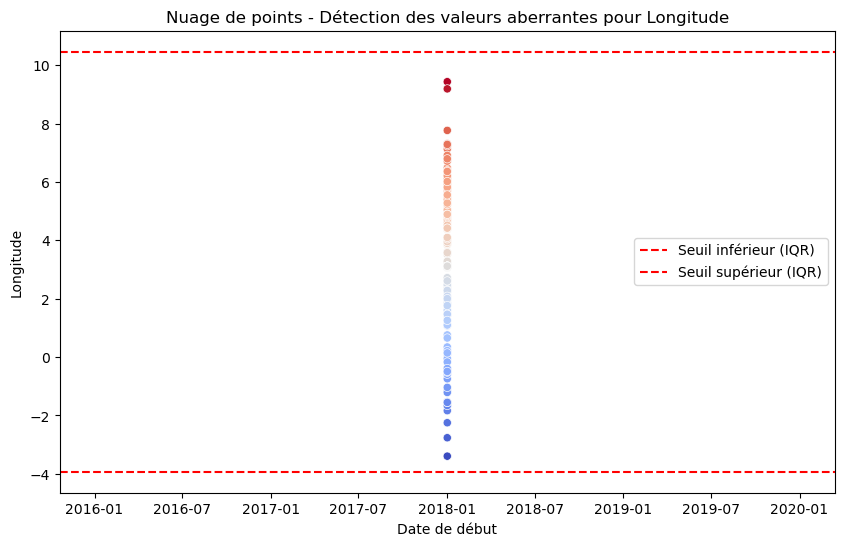

✔️ Les valeurs aberrantes de 'Longitude' ont été remplacées par la médiane (3.113833).


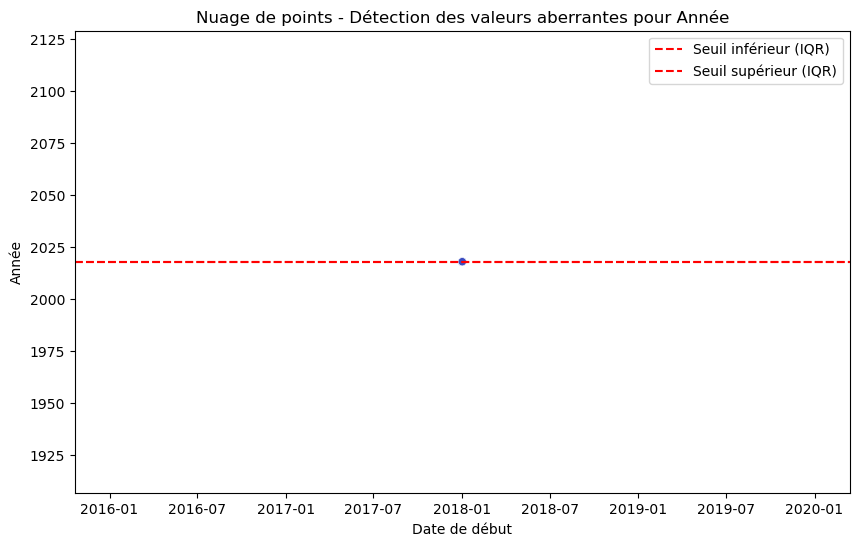

✔️ Les valeurs aberrantes de 'Année' ont été remplacées par la médiane (2018.0).


KeyError: 'effectif_de_deces'

In [55]:


# 2. Détection des doublons
print("\nDoublons détectés :")
print(df_NO[df_NO.duplicated()])
print(df_PM[df_PM.duplicated()])
print(df_mort[df_mort.duplicated()])


# 1. Vérification des types de données
print("Types de données :")
print(df_NO.dtypes)
print(df_PM.dtypes)
print(df_mort.dtypes)

numerical_columns = df_PM.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détection des outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Visualisation des outliers
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Date de début', y=col, hue=col, palette='coolwarm', legend=None)
    plt.axhline(y=lower_bound, color='r', linestyle='--', label='Seuil inférieur (IQR)')
    plt.axhline(y=upper_bound, color='r', linestyle='--', label='Seuil supérieur (IQR)')
    plt.title(f"Nuage de points - Détection des valeurs aberrantes pour {col}")
    plt.legend()
    plt.show()
    
    # Imputation des valeurs aberrantes par la médiane
    median_value = df[col].median()
    df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    print(f"✔️ Les valeurs aberrantes de '{col}' ont été remplacées par la médiane ({median_value}).")

numerical_columns_NO = df_NO.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns_NO:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détection des outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Visualisation des outliers
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Date de début', y=col, hue=col, palette='coolwarm', legend=None)
    plt.axhline(y=lower_bound, color='r', linestyle='--', label='Seuil inférieur (IQR)')
    plt.axhline(y=upper_bound, color='r', linestyle='--', label='Seuil supérieur (IQR)')
    plt.title(f"Nuage de points - Détection des valeurs aberrantes pour {col}")
    plt.legend()
    plt.show()
    
    # Imputation des valeurs aberrantes par la médiane
    median_value = df[col].median()
    df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    print(f"✔️ Les valeurs aberrantes de '{col}' ont été remplacées par la médiane ({median_value}).")

# Sélection des colonnes numériques en excluant "region_de_domicile"
numerical_columns_mort = df_mort.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_mort = numerical_columns_mort.drop("region_de_domicile", errors='ignore')

for col in numerical_columns_mort:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détection des outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Visualisation des outliers
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='annee_de_deces', y=col, hue=col, palette='coolwarm', legend=None)
    plt.axhline(y=lower_bound, color='r', linestyle='--', label='Seuil inférieur (IQR)')
    plt.axhline(y=upper_bound, color='r', linestyle='--', label='Seuil supérieur (IQR)')
    plt.title(f"Nuage de points - Détection des valeurs aberrantes pour {col}")
    plt.legend()
    plt.show()
    
    # Imputation des valeurs aberrantes par la médiane
    median_value = df[col].median()
    df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    print(f"✔️ Les valeurs aberrantes de '{col}' ont été remplacées par la médiane ({median_value}).")




d) Normaliser vos données

In [78]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Initialiser l'encodeur pour les variables catégorielles
encoder_maladie = OneHotEncoder(drop='first', sparse=False)
encoder_sexe = OneHotEncoder(drop='first', sparse=False)

# Encode la variable 'cause_initiale_de_deces'
encoded_maladie = encoder_maladie.fit_transform(df_mort[['cause_initiale_de_deces']])
df_encoded_maladie = pd.DataFrame(encoded_maladie, columns=encoder_maladie.get_feature_names_out(['cause_initiale_de_deces']))
df_mort = df_mort.join(df_encoded_maladie).drop(columns=['cause_initiale_de_deces'])

# Encode la variable 'sexe'
encoded_sexe = encoder_sexe.fit_transform(df_mort[['sexe']])
df_encoded_sexe = pd.DataFrame(encoded_sexe, columns=encoder_sexe.get_feature_names_out(['sexe']))
df_mort = df_mort.join(df_encoded_sexe).drop(columns=['sexe'])

# Sélectionner toutes les colonnes numériques, sauf 'region_de_domicile'
numerical_columns = df_mort.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'region_de_domicile']

# Initialiser le scaler (ici StandardScaler, mais tu peux utiliser MinMaxScaler si tu préfères)
scaler = StandardScaler()

# Normaliser toutes les colonnes numériques, sauf 'region_de_domicile'
df_mort[numerical_columns] = scaler.fit_transform(df_mort[numerical_columns])

# Afficher le DataFrame final avec les variables numériques et catégorielles normalisées
print(df_mort)


      annee_de_deces  region_de_domicile classe_d_age_de_10_ans  \
0         2019-01-01                   1                  35-44   
1         2020-01-01                   1                  35-44   
2         2021-01-01                   1                  35-44   
3         2022-01-01                   1                  35-44   
4         2019-01-01                   2                  35-44   
...              ...                 ...                    ...   
10579     2022-01-01                  93                    95p   
10580     2019-01-01                  94                    95p   
10581     2020-01-01                  94                    95p   
10582     2021-01-01                  94                    95p   
10583     2022-01-01                  94                    95p   

       effectif_de_deces  cause_initiale_de_deces_2. Tumeurs  \
0              -0.417300                           -0.408248   
1              -0.415958                           -0.408248   
2  

In [ ]:

numerical_columns = df_PM.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

df_PM[numerical_columns] = scaler.fit_transform(df_PM[numerical_columns])

print(df_PM)


    Date de début         Date de fin                     Organisme  \
0      2019-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
1      2019-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
2      2019-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
3      2019-01-01 2022-12-31 23:59:59                      ATMO SUD   
4      2019-01-01 2022-12-31 23:59:59                      ATMO SUD   
..            ...                 ...                           ...   
152    2019-01-01 2018-12-31 23:59:59               QUALITAIR CORSE   
153    2019-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
154    2019-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
155    2019-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
156    2019-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   

      code zas                         Zas code site              nom site  \
0    FR44ZAG02                    ZAG METZ   FR01011           Metz-C

In [80]:
numerical_columns = df_NO.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

df_NO[numerical_columns] = scaler.fit_transform(df_NO[numerical_columns])

print(df_NO)


    Date de début         Date de fin                     Organisme  \
0      2022-01-01 2019-12-31 23:59:59                ATMO GRAND EST   
1      2022-01-01 2019-12-31 23:59:59                ATMO GRAND EST   
2      2022-01-01 2019-12-31 23:59:59                ATMO GRAND EST   
3      2022-01-01 2019-12-31 23:59:59                ATMO GRAND EST   
4      2022-01-01 2019-12-31 23:59:59                ATMO GRAND EST   
..            ...                 ...                           ...   
426    2018-01-01                 NaT  ATMO BOURGOGNE-FRANCHE-COMTE   
427    2018-01-01                 NaT  ATMO BOURGOGNE-FRANCHE-COMTE   
428    2018-01-01                 NaT  ATMO BOURGOGNE-FRANCHE-COMTE   
429    2018-01-01                 NaT  ATMO BOURGOGNE-FRANCHE-COMTE   
430    2018-01-01                 NaT  ATMO BOURGOGNE-FRANCHE-COMTE   

      code zas                         Zas code site             nom site  \
0    FR44ZAG02                    ZAG METZ   FR01011          Metz-Cen

### 4.	Analyse exploratoire

a) Créer des visualisations montrant les variations de la pollution et des décès pour des périodes similaires.


,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Année
0,2019-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,PM2.5,Fond,...,0.623670,µg-m3,-1.035291,0.290950,-0.306381,R,0.356848,0.419136,0.266783,1.296264
1,2019-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,PM2.5,Fond,...,-0.818303,µg-m3,-0.165812,0.231470,0.084024,R,0.356848,0.438219,0.265152,1.296264
2,2019-01-01,2022-12-31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR01065,Belleville sur Meuse,Urbaine,PM2.5,Trafic,...,-0.050655,µg-m3,0.160242,0.290950,0.307113,R,0.356848,0.422997,0.212628,1.296264
3,2019-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02008,Port de Bouc Leque,Urbaine,PM2.5,Industrielle,...,0.022009,µg-m3,0.486296,0.290950,0.474429,R,0.356848,-0.037565,0.184945,1.296264
4,2019-01-01,2022-12-31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02013,Fos Les Carabins,Périurbaine,PM2.5,Industrielle,...,0.210104,µg-m3,0.377612,-0.244373,-0.083293,R,0.356848,-0.033013,0.181713,1.296264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2019-01-01,2018-12-31 23:59:59,QUALITAIR CORSE,FR94ZRE01,ZR CORSE,FR41024,VENACO,Rurale régionale,PM2.5,Fond,...,-1.810938,µg-m3,-0.817921,0.231470,-0.250609,R,0.356848,-0.130696,0.472191,-1.497355
153,2019-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR03,ZAR BESANCON,FR82006,Besancon Prevoyance,Urbaine,PM2.5,Fond,...,1.112255,µg-m3,0.268927,0.290950,0.362885,R,0.356848,0.269602,0.255492,-1.497355
154,2019-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR01,ZAR BELFORT-MONTBELIARD,FR82010,Montbéliard centre,Urbaine,PM2.5,Fond,...,0.732121,µg-m3,0.268927,0.231470,0.362885,R,0.356848,0.290602,0.308638,-1.497355
155,2019-01-01,2018-12-31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,PM2.5,Fond,...,0.276031,µg-m3,0.486296,0.290950,0.474429,R,0.356848,0.223586,0.224174,-1.497355


b) Analyser les corrélations entre les variables de pollution et les données de mortalité


### 5.	Ingénierie des caractéristiques

a)	Écrire des fonctions qui calculent les variables dérivées (moyennes des polluants)

b)	Intégrer des données météorologiques si disponibles en utilisant une API météo (comme OpenWeatherMap)

### 6.	Réduction de dimensionnalité

a)	Appliquer des techniques de réduction de dimensionnalité sur les données de pollution

b)	Générer des visualisations des composantes principales

### 7.	Évaluation et interprétation

a)	Évaluer les impacts de la pollution sur la mortalité en utilisant les dimensions réduites 

b)	Identifier des clusters démographiques et géographiques  

c)	Interprétez les résultats, par exemple une augmentation de X µg/m³ de PM2.5 est associée à une augmentation de Y% du taux de mortalité

## III. Modalités et livrables

### 1. Modalités

Le projet commence le 21/01 et la présentation du travail aura lieu le 11/02 

### 2. Livrables

Une archive (enregistrée sous vos noms) comprenant : 
- Code python 
- Les données 
- Un rapport de 5 pages max décrivant les différentes étapes (pas de code)
- La présentation